In [ ]:
# Import the required Python libraries
import pandas as pd          # For data handling
import numpy as np           # For numeric operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns        # For beautiful visualizations

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib  # For saving models




In [ ]:
# Read the uploaded CSV file into a DataFrame
df = pd.read_csv('creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:

# Check the shape (rows, columns)
print("Dataset Shape:", df.shape)


Dataset Shape: (49610, 31)


In [ ]:
# Check if any column has missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [ ]:
# Show how many transactions are fraud vs not fraud
print("Class distribution:\n", df['Class'].value_counts())


Class distribution:
 Class
0.0    49461
1.0      148
Name: count, dtype: int64


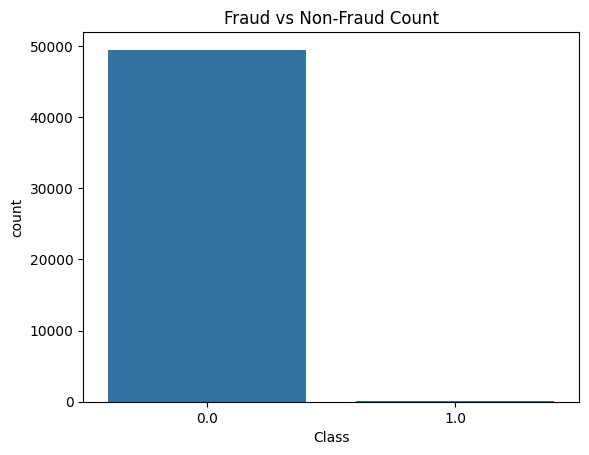

In [ ]:
# Plot the class distribution
sns.countplot(data=df, x='Class')
plt.title("Fraud vs Non-Fraud Count")
plt.show()


In [ ]:
# Separate features (X) and target label (y)
X = df.drop('Class', axis=1)
y = df['Class']


In [ ]:
# Normalize the 'Amount' column using StandardScaler
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])


In [ ]:
# Check for any NaN values in features
print("Missing values in X:\n", X.isnull().sum())

# Check total missing values
print("Total missing values in X:", X.isnull().sum().sum())
# Check for missing values in y
print("Missing values in y:", y.isnull().sum())




Missing values in X:
 Time      0
V1        0
V2        0
V3        0
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
dtype: int64
Total missing values in X: 26
Missing values in y: 1


In [ ]:
# Fill missing values with 0 (or mean if you prefer)
X = X.fillna(0)


In [ ]:
# Combine X and y to filter together
data = X.copy()
data['Target'] = y

# Remove rows where target is NaN
data = data.dropna(subset=['Target'])

# Separate back to X and y
y = data['Target']
X = data.drop(columns=['Target'])


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit only on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.998085063495263
Confusion Matrix:
 [[9881   11]
 [   8   22]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9892
         1.0       0.67      0.73      0.70        30

    accuracy                           1.00      9922
   macro avg       0.83      0.87      0.85      9922
weighted avg       1.00      1.00      1.00      9922



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict
rf_preds = rf_model.predict(X_test_scaled)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.9992944970772022
Confusion Matrix:
 [[9890    2]
 [   5   25]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9892
         1.0       0.93      0.83      0.88        30

    accuracy                           1.00      9922
   macro avg       0.96      0.92      0.94      9922
weighted avg       1.00      1.00      1.00      9922



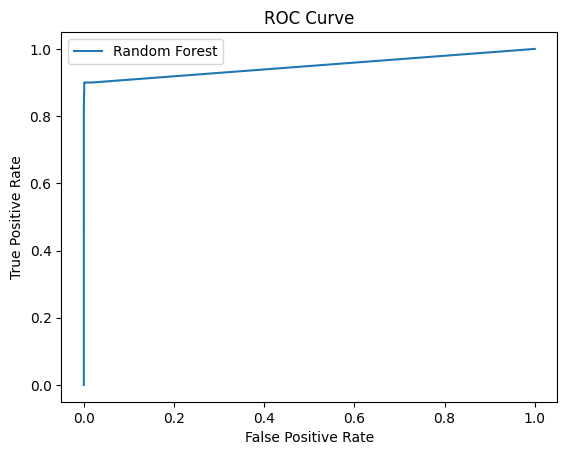

ROC AUC Score: 0.9490362582558296


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities
rf_probs = rf_model.predict_proba(X_test_scaled)[:,1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, rf_probs))


In [ ]:
import joblib
joblib.dump(model, "fraud_detection_model.pkl")


['fraud_detection_model.pkl']